In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
data.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
data['Date'].value_counts()

11-08-2015    25
06-08-2013    25
07-08-2016    25
12-08-2014    25
24-07-2015    25
              ..
30-06-2013    25
19-07-2016    25
20-07-2014    25
26-08-2014    25
14-07-2015    25
Name: Date, Length: 310, dtype: int64

In [62]:
#EDA

In [5]:
#lets check all the columns and data type of each.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


We See there are float64 data type with 24 columns and 1 column with object datatype.

In [6]:
#Lets drop the column date as it would not be needed.
data.drop('Date', axis =1, inplace =True)

In [11]:
#Lets check for null values now

data.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
data.shape

(7752, 24)

In [16]:
#Filling out the null values of the dataset.

data =  data.fillna(method='ffill')#Mean since the data is continuous

In [17]:
data.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [12]:
#Lets check how the data is distributed

data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


With the above we see how the data is distributed and see the mean, standard deviation, percentage of value falling under 25%,50%,75%, Min Value, Max Value of each column.

In [18]:
#Lets check the shape of dataset now.

data.shape

(7752, 24)

We see that there are 7752 rows and 24 columns in the dataset.

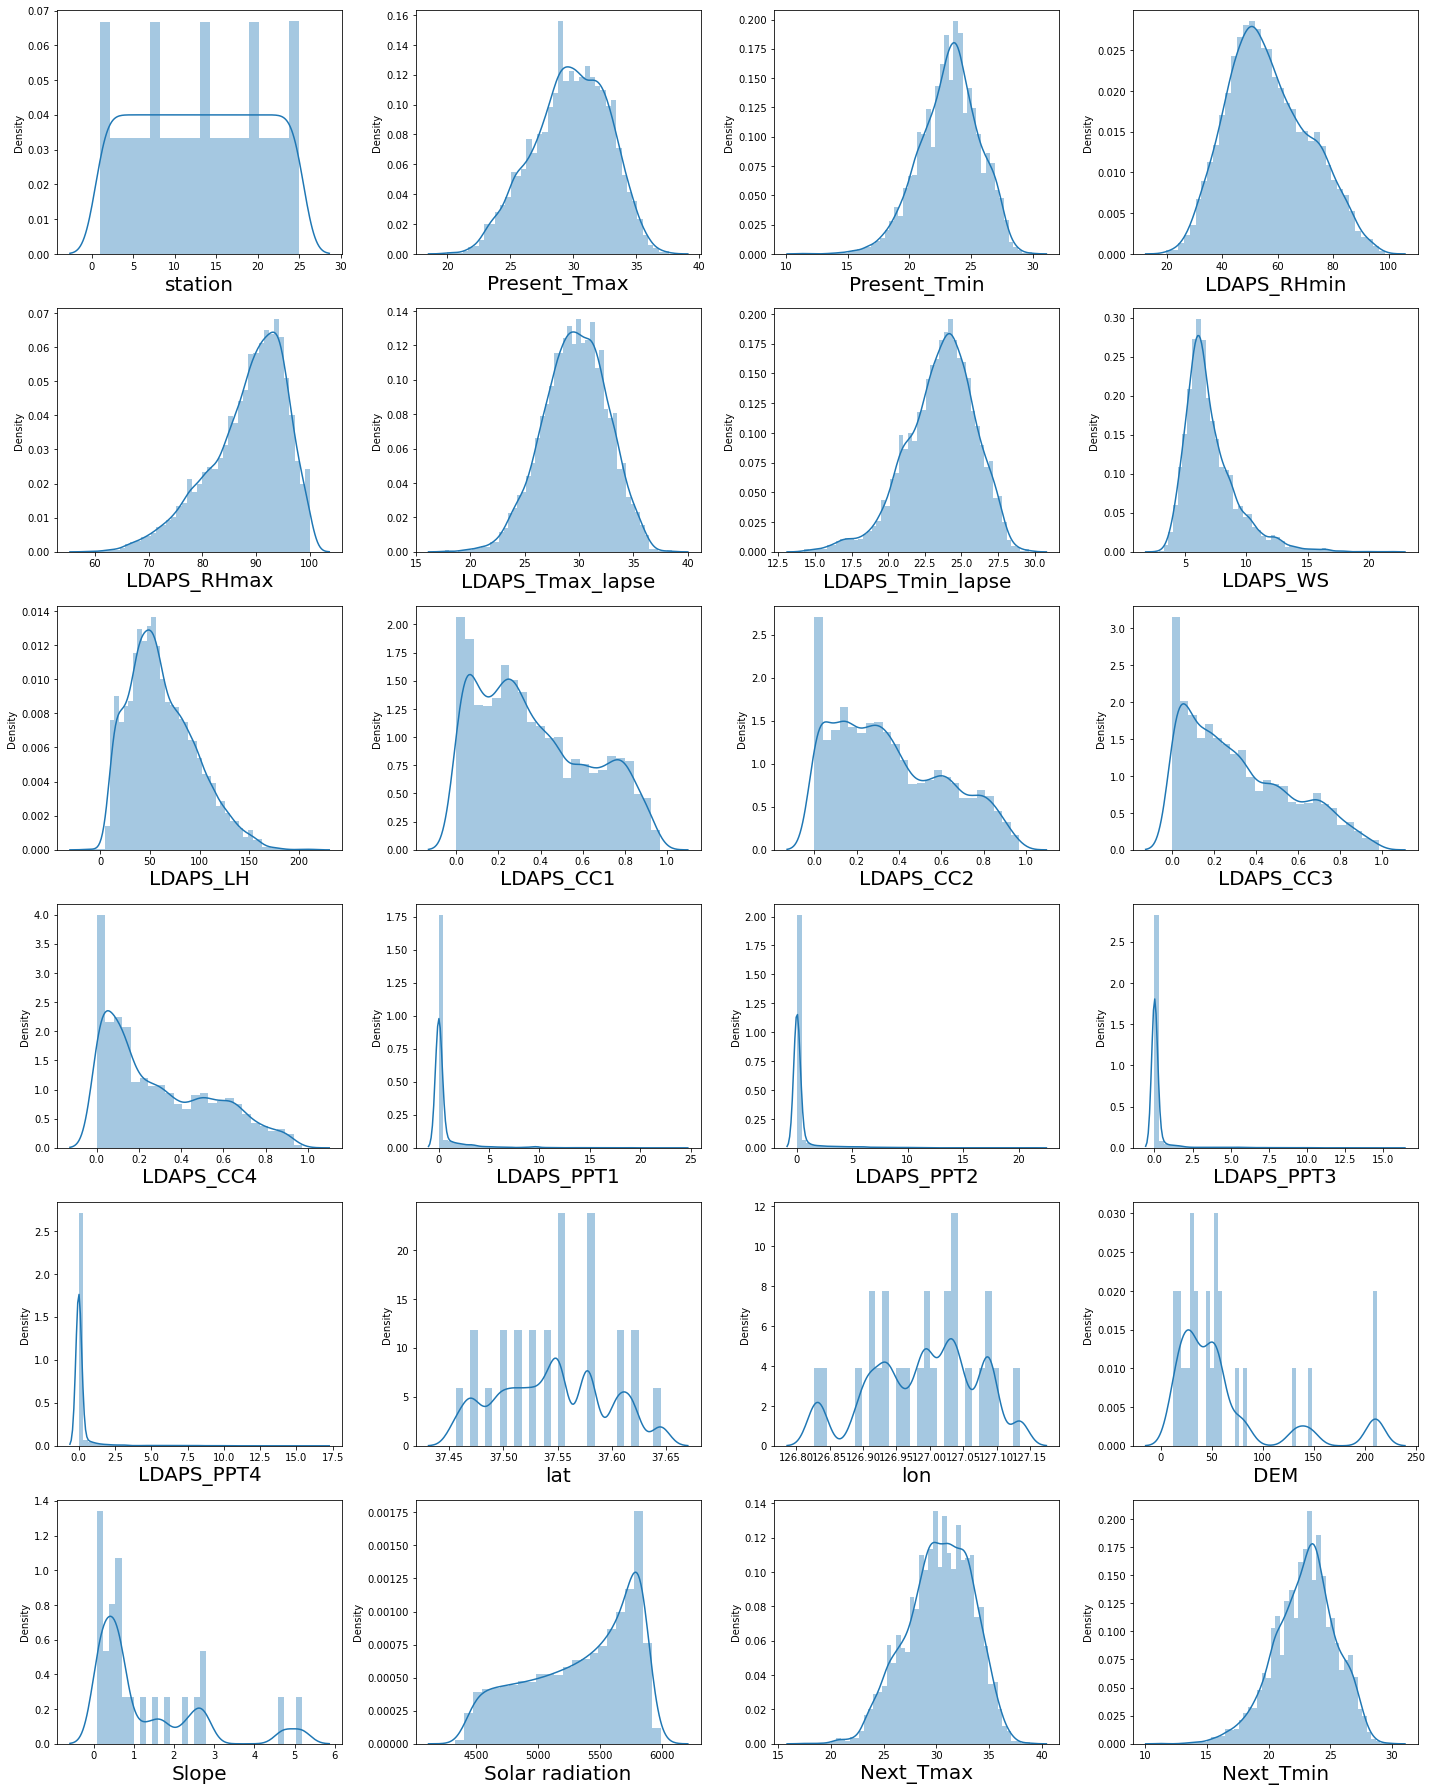

In [19]:
#Plotting dist plot to check for skewness

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=24:
        ax=plt.subplot(6,4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize= 20)
        
    plotnumber+=1
plt.tight_layout()

In [20]:
data.skew()

station            -0.000100
Present_Tmax       -0.262761
Present_Tmin       -0.365327
LDAPS_RHmin         0.305376
LDAPS_RHmax        -0.840464
LDAPS_Tmax_lapse   -0.237722
LDAPS_Tmin_lapse   -0.576234
LDAPS_WS            1.572524
LDAPS_LH            0.677272
LDAPS_CC1           0.435814
LDAPS_CC2           0.471318
LDAPS_CC3           0.640210
LDAPS_CC4           0.663585
LDAPS_PPT1          5.077981
LDAPS_PPT2          5.776895
LDAPS_PPT3          6.458810
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339228
Next_Tmin          -0.402800
dtype: float64

With the above plots and method it looks like there is skewness in the columns: LDAPS_RHmax,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM ,Slope,Solar radiation.

In [21]:
#We will proceed ahead and check the relation of each feature with the label to see if they are positively related or not.

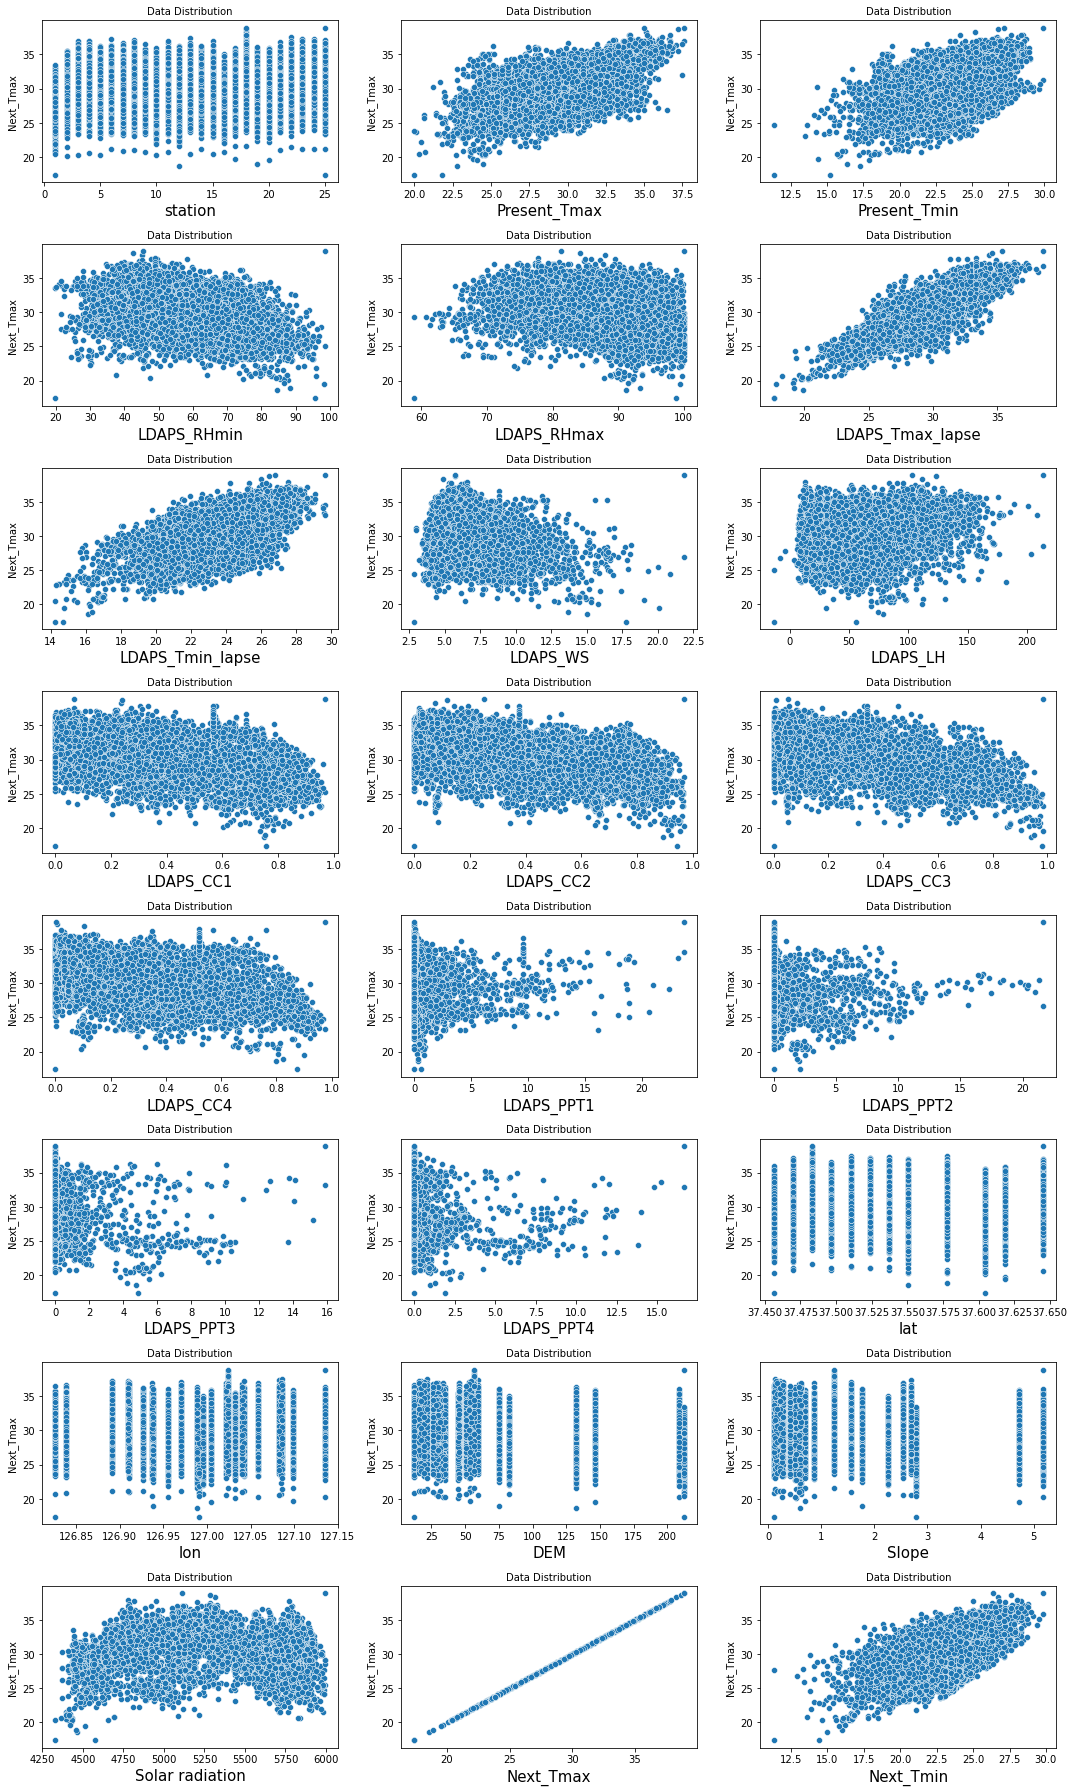

In [22]:
#Plotting scatter plot to see the relation of features with label(capacity_mw)

plt.figure(figsize = [15,25])
plotnumber = 1

for column in data:
    if plotnumber<=24:
        ax = plt.subplot(8,3,plotnumber)
        sns.scatterplot(x = data[column], y= data['Next_Tmax'])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

It is visible that Next_Tmax has positive relation with most of the features.

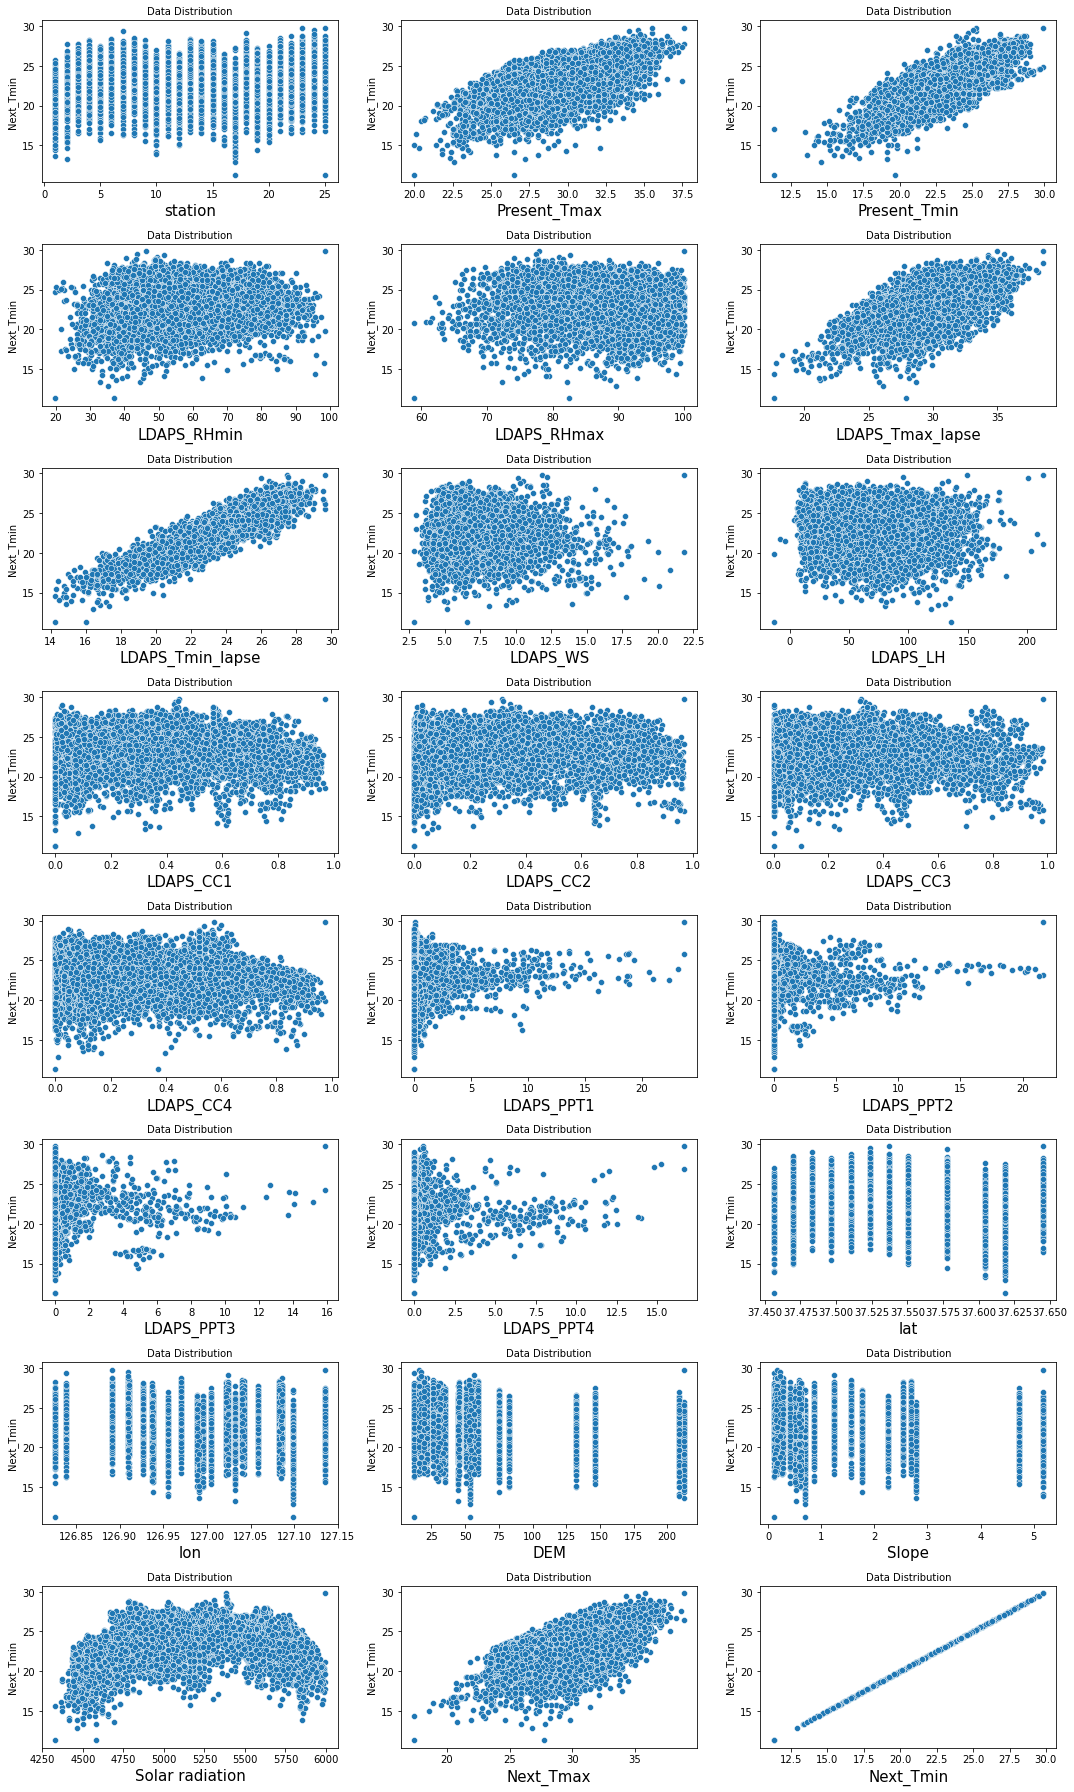

In [23]:
#Plotting scatter plot to see the relation of features with label(primary_fuel)

plt.figure(figsize = [15,25])
plotnumber = 1

for column in data:
    if plotnumber<=24:
        ax = plt.subplot(8,3,plotnumber)
        sns.scatterplot(x = data[column], y= data['Next_Tmin'])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

It also has strong possitive relation with some of the features.

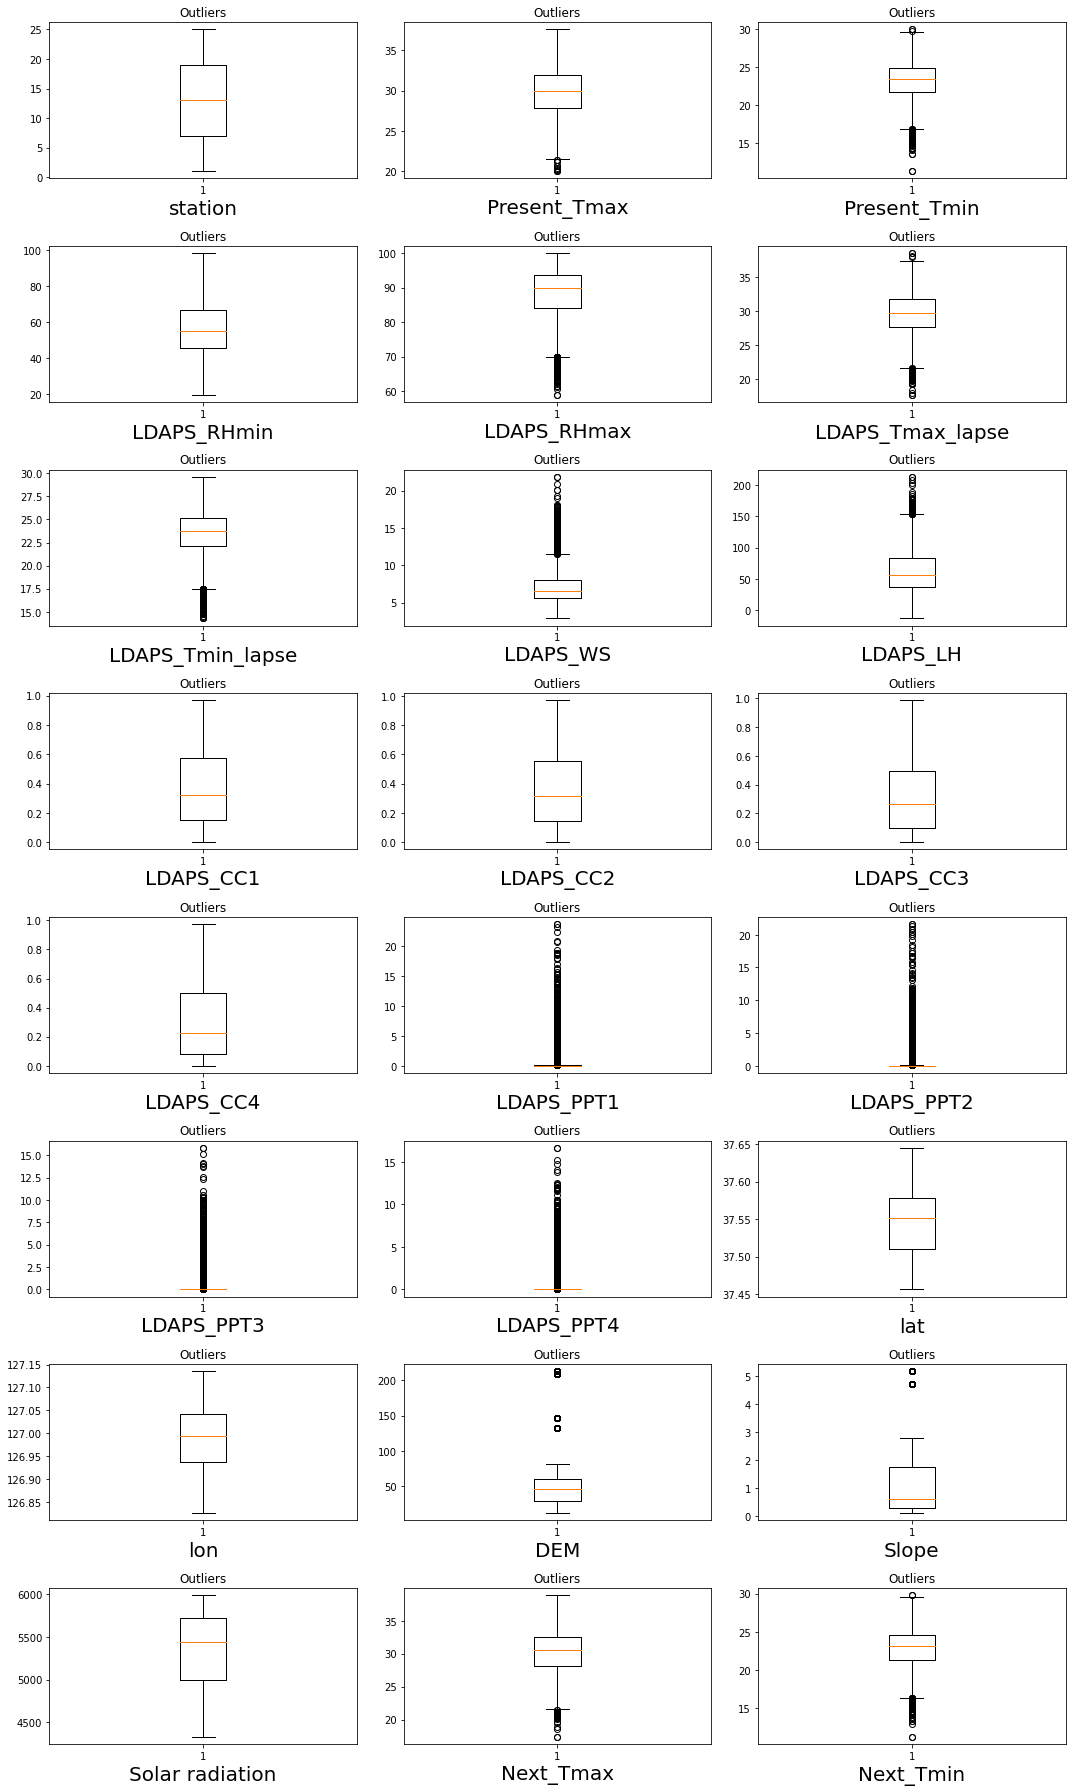

In [25]:
#Checking for outliers
plt.figure(figsize=(15,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=24:
        ax = plt.subplot(8,3,plotnumber)
        plt.boxplot(data[column])
        plt.xlabel(column, fontsize=20)
        plt.title('Outliers')
    
    plotnumber +=1
plt.tight_layout()

With the help of above plotting we can see that there are too many outliers in the column station,Present_Tmax,Present_Tmin, LDAPS_RHmax,LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope.

In [26]:
data.columns.view()

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [15]:
#Now will check the collinearity among features with the help of heatmap.

In [27]:
corr_mat = data.corr()
corr_mat

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.111776,0.130522,-0.066498,-0.166788,0.068388,0.103435,0.006307,-0.132249,0.007072,...,-0.005717,-0.009616,-0.007513,-0.237367,-0.118721,-0.255339,-0.089596,-0.019175,0.106658,0.127650
Present_Tmax,0.111776,1.000000,0.618556,-0.204582,-0.308430,0.574712,0.631731,-0.125331,0.128107,-0.307408,...,-0.102192,-0.122079,-0.099068,-0.053037,0.005522,-0.187254,-0.107231,-0.025125,0.613377,0.624810
Present_Tmin,0.130522,0.618556,1.000000,0.121375,-0.021003,0.475268,0.775718,-0.033949,-0.017817,0.095303,...,0.065458,-0.048568,-0.063415,-0.078343,-0.047783,-0.249497,-0.146940,0.053955,0.473438,0.799022
LDAPS_RHmin,-0.066498,-0.204582,0.121375,1.000000,0.576600,-0.565265,0.085025,0.290631,-0.067878,0.606244,...,0.390904,0.241036,0.168918,0.086916,-0.076077,0.101901,0.123485,0.247154,-0.443221,0.093880
LDAPS_RHmax,-0.166788,-0.308430,-0.021003,0.576600,1.000000,-0.374495,-0.121587,0.137244,0.244137,0.429820,...,0.229412,0.135075,0.118466,0.195016,0.025564,0.176462,0.218723,0.154055,-0.290630,-0.078832
LDAPS_Tmax_lapse,0.068388,0.574712,0.475268,-0.565265,-0.374495,1.000000,0.657472,-0.307419,0.038767,-0.423312,...,-0.243352,-0.189151,-0.161565,-0.041809,0.090053,-0.177689,-0.161238,0.040841,0.837673,0.593139
LDAPS_Tmin_lapse,0.103435,0.631731,0.775718,0.085025,-0.121587,0.657472,1.000000,-0.129924,-0.144932,0.022003,...,-0.002706,-0.090263,-0.096669,-0.095343,-0.026447,-0.193602,-0.184087,0.151091,0.598891,0.886497
LDAPS_WS,0.006307,-0.125331,-0.033949,0.290631,0.137244,-0.307419,-0.129924,1.000000,0.008026,0.289114,...,0.191444,0.161147,0.143778,0.036601,-0.059375,0.190759,0.171364,0.121224,-0.342904,-0.098490
LDAPS_LH,-0.132249,0.128107,-0.017817,-0.067878,0.244137,0.038767,-0.144932,0.008026,1.000000,-0.152428,...,-0.075038,0.017650,0.021643,0.132641,0.025709,0.054895,0.086405,-0.041063,0.146836,-0.063710
LDAPS_CC1,0.007072,-0.307408,0.095303,0.606244,0.429820,-0.423312,0.022003,0.289114,-0.152428,1.000000,...,0.385295,0.166210,0.089359,-0.008097,-0.006814,-0.014033,-0.020667,0.213084,-0.440748,-0.003693


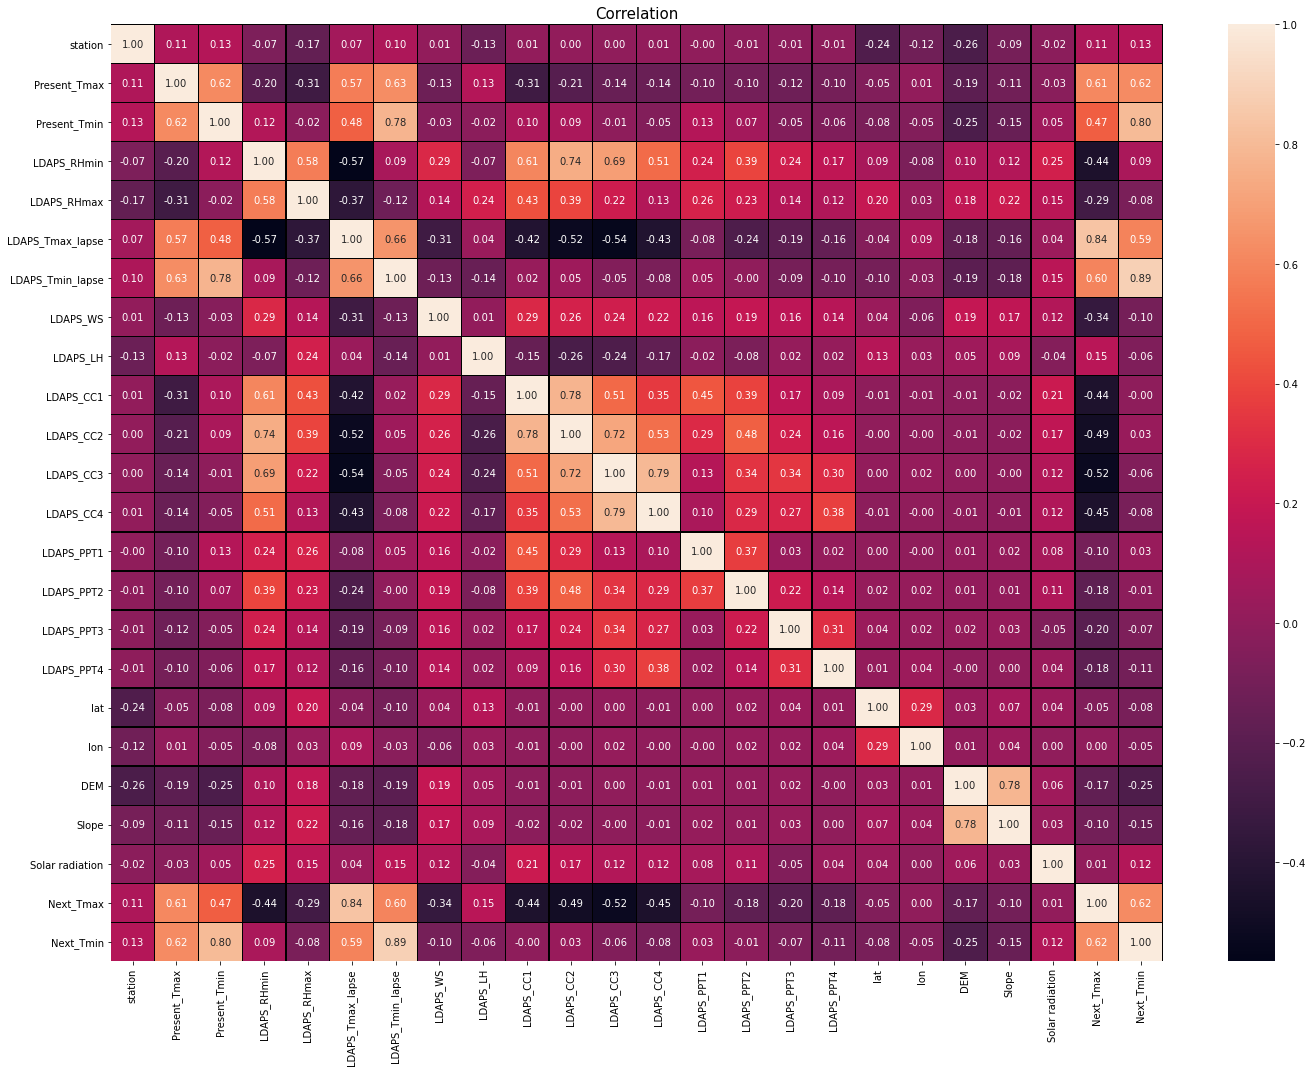

In [28]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True, linewidths=0.3,linecolor="black",fmt='.2f')
plt.title('Correlation', fontsize=15)
plt.tight_layout()

With the heatmap we found that there is little bit of correlation between few features.

Next_Tmax has Minimum Correlation with the column : LDAPS_CC3(-52%)

Next_Tmax has Maximum Correlation with the column : LDAPS_Tmax_lapse - (84%)

Next_Tmin has Minimum Correlation with the column : DEM (-25%)

Next_Tmin has Maximum Correlation with the column :  LDAPS_Tmax_lapse(89%)

### Removing Outliers:

In [29]:
#Let us now remove outliers with the help of Z-score Method.

from scipy import stats

z = np.abs(stats.zscore(data))
print(z)
print('\n Row Numbers ==>', np.where(z>3)[0])
print('\n Column Numbers ==>', np.where(z>3)[1])

[[1.66415031 0.360552   0.75816525 ... 1.51793488 0.37508983 0.69645021]
 [1.52550689 0.71707697 0.67526674 ... 1.22994952 0.07240051 0.17395312]
 [1.38686347 0.61604925 0.02937058 ... 1.21653443 0.26418209 0.38873605]
 ...
 [1.66329184 2.2127268  2.41613541 ... 2.0743251  0.79061658 2.22374939]
 [1.66329184 3.29035577 4.94453991 ... 2.35821196 4.11483058 4.67546649]
 [1.66329184 2.63660358 2.76502135 ... 1.51793488 2.75734259 2.76006898]]

 Row Numbers ==> [  25   25   26 ... 7751 7751 7751]

 Column Numbers ==> [ 7 14 14 ... 14 15 16]


In [30]:
#Storing the zcore > 3 in i

i = np.where(z>3)[0]

#Deleting the indexes having outliers stored in the above variable

new_data = data.drop(data.index[i])

### Removing Skewness :

In [31]:
#let's first separate label and features in x and y variable.

x = new_data.drop(columns=['Next_Tmax','Next_Tmin'], axis = 1)
y = new_data[['Next_Tmax','Next_Tmin']]

In [32]:
#Importing Power Transform to remove skewness from the entire dataset

from sklearn.preprocessing import power_transform

# Applying it on X to remove the skewness from features.

x = power_transform(x, method='yeo-johnson')

x

array([[-1.87146801, -0.4813445 , -0.84344338, ...,  1.85419204,
         1.329275  ,  1.88783881],
       [-1.65900734,  0.66074486, -0.7617294 , ...,  0.06963094,
        -0.37456923,  1.43168272],
       [-1.46499795,  0.54813969, -0.04315317, ..., -0.35341576,
        -0.94336859,  1.41129461],
       ...,
       [ 1.31039615, -2.11631089, -2.45402602, ..., -1.57620193,
        -1.27815191, -1.78205439],
       [ 1.42573499, -2.11631089, -2.2462655 , ..., -1.397182  ,
        -1.06841316, -1.78820566],
       [ 1.53984974, -2.14316732, -2.35084225, ..., -1.18796234,
        -0.92910841, -1.77199984]])

### Model Building :

In [33]:
# Import Standard Scaler to scale the data

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [36]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [37]:
#Importing Train Test Split to train and test the model

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=200)

In [40]:
#Now Model Initiating and Training

In [41]:
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()

In [42]:
LR.fit(x_train,y_train)
DT.fit(x_train,y_train)
RF.fit(x_train,y_train)
print("All Models Trained")

All Models Trained


In [43]:
#Prediction Scores for each trained model

In [44]:
LR.score(x_test,y_test)

0.7891733471505457

In [45]:
DT.score(x_test,y_test)

0.7420217255155571

In [46]:
RF.score(x_test,y_test)

0.8856649780575163

In [47]:
#With the above adjusted r2 score of all the models we see that RandomForestRegressor is giving us the best prediction.

In [48]:
#Now will check the mean squared error of each trained model.

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
y_pred1=LR.predict(x_test)
y_pred2 =DT.predict(x_test)
y_pred3=RF.predict(x_test)

In [51]:
mean_squared_error(y_test,y_pred1) # For the linear regression model

1.5350998675916088

In [52]:
mean_squared_error(y_test,y_pred2) #For the Decision Tree Regressor Model

1.834502906976745

In [53]:
mean_squared_error(y_test,y_pred3) # For the random forest regressor model

0.8196507715116277

It has become quite clear with the above scores that RandomForestRegressor is best fit for this model as the mean_squared_error of it is least as compared with all others models

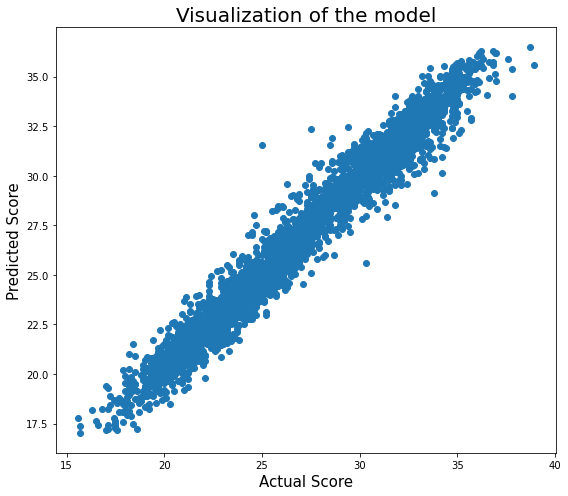

In [55]:
#Visiualizing it on plot.

plt.figure(figsize = [8,7])
plt.scatter(y_test,y_pred3)
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

### Cross Validation:

In [56]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(RF,x_train,y_train,cv=5)

cvs.mean()

0.8791154995911434

Since there is not much difference we can say that the model is neither overfitting or underfitting.

### HyperParameter Tuning:

In [48]:
##Doing hyper parameter tuning for it

In [59]:
from sklearn.model_selection import GridSearchCV

In [57]:
params = {'n_estimators':[110,100,120],
         'max_depth':[11,12],
         'min_samples_leaf': [2,3],
         'min_samples_split': [3,4],
         'random_state':[100,300]}

In [60]:
grid = GridSearchCV(RF, param_grid= params, cv= 3, n_jobs=-1)

In [61]:
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [11, 12], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 4],
                         'n_estimators': [110, 100, 120],
                         'random_state': [100, 300]})

In [62]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 110, 'random_state': 100}


In [63]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [64]:
clf.fit(x_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=3,
                      n_estimators=110, random_state=100)

In [65]:
y_pred =  clf.predict(x_test)

In [66]:
mean_squared_error(y_test,y_pred)

0.8720376571111371

In [67]:
clf.score(x_test,y_test)

0.8782571800568164

In [68]:
mean_absolute_error(y_test,y_pred)

0.7114719231704217

In [69]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.9338295653443068

In [70]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(RF,x_train,y_train,cv=5)

cvs.mean()

0.8792178821632962

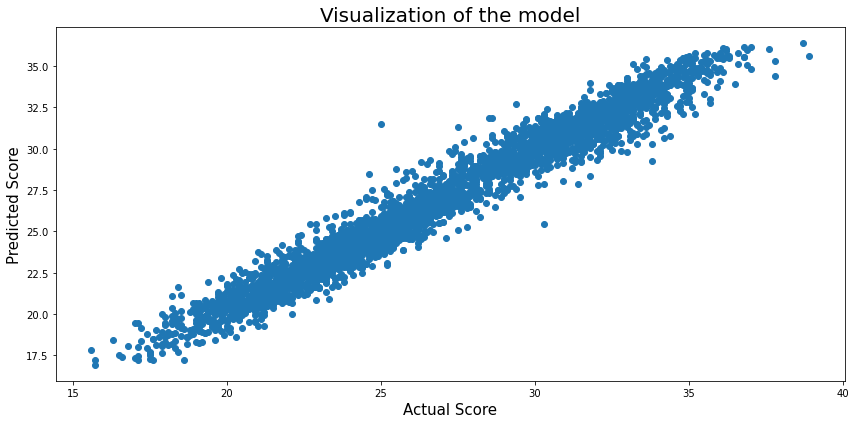

In [71]:
plt.figure(figsize = [12,6])
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score', fontsize=15)
plt.ylabel('Predicted Score',fontsize=15)
plt.title('Visualization of the model', fontsize = 20)
plt.tight_layout()

In [72]:
#Saving the model

In [74]:
import joblib

In [75]:
filename = 'Temperature Forecast Project using ML.sav'
joblib.dump(clf, filename)

['Temperature Forecast Project using ML.sav']